准确度： 0.9
准确度： 0.9


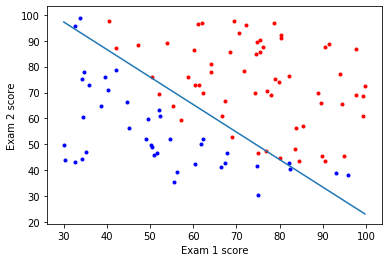

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris


#加载数据
def loaddata():
    data=np.loadtxt('data1.txt',delimiter=',')
    n=data.shape[1]-1 #特征数
    X=data[:,0:n]
    y=data[:,-1].reshape(-1,1) #将数据转换成一列
    return X,y


#定义sigmoid函数
def sigmoid(z):
    return 1.0/(1+np.exp(-z))

#实现假设函数
def hypothesis(X,theta):
    z=np.dot(X,theta)
    return sigmoid(z)

#定义损失函数
def computeCost(X,y,theta):
    m=X.shape[0]
    z=-1*y*np.log(hypothesis(X,theta))-(1-y)*np.log(1-hypothesis(X,theta))
    return np.sum(z)/m

#梯度下降
def gradientDescent(X,y,theta,iterations,alpha):
    m=X.shape[0]  #获取数据条数
    X=np.hstack((np.ones((m,1)),X)) #在X最前面插入全1的列
    
    for i in range(iterations):
        for j in range(len(theta)):
            theta[j]=theta[j]-(alpha/m)*np.sum((hypothesis(X,theta)-y)*X[:,j].reshape(-1,1))
       # if(i%50000==0):
        #    print('第',i,'次迭代，当前损失为：',computeCost(X,y,theta),'theta=',theta)
            
#定义预测函数
def predict(X):
    #在X最前面插入全1的列
    c=np.ones(X.shape[0]).transpose()
    np.hstack
    X=np.insert(X,0,values=c,axis=1)
    
    h=hypothesis(X,theta)
    #根据概率值决定分类
    h[h>=0.5]=1
    h[h<0.5]=0
    
    return h

#画出散点图
def plot(X,y):
    pos=np.where(y==1)
    neg=np.where(y==0)
    plt.scatter(X[pos[0],0],X[pos[0],1],marker='.',c='r')
    plt.scatter(X[neg[0],0],X[neg[0],1],marker='.',c='b')
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
  #  plt.show()
    
#画出决策边界
def plotDescisionBoundary(X,y,theta):
    x1=np.arange(min(X[:,0]),max(X[:,0]),0.1)
    x2=-(theta[1]*x1+theta[0])/theta[2] #分类决策面 theta0+theta1*x1+theta2*x2 = 0
    plt.plot(x1,x2)
  #  plt.show()
    

X,y=loaddata() #获取数据

iterations=250000 #迭代次数
alpha=0.008
n=X.shape[1]
theta=np.zeros(n+1).reshape(n+1,1)

gradientDescent(X,y,theta,iterations,alpha)
h=predict(X)
print('准确度：',np.mean(h==y))
print('准确度：',accuracy_score(y,h))
plotDescisionBoundary(X,y,theta)
plot(X,y)
plt.show()